In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
orders = pd.read_csv('orders.csv')
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
departments = pd.read_csv('departments.csv')
aisles = pd.read_csv('aisles.csv')
products = pd.read_csv('products.csv')

In [3]:
# MERGE 1차 - 주문량에 따른 department

tmp_value_count = pd.DataFrame(products['department_id'].value_counts())
value_count_index = tmp_value_count.reset_index()

depart_c = pd.merge(left = departments, right = value_count_index, left_on = 'department_id', right_on='index')

del depart_c['index']

depart_c.columns = ['department_id', 'department', 'value_count']

# MERGE 2차 - product name에 따른 department 유형

product_depart = pd.merge(left=products, right=departments, left_on='department_id', right_on='department_id')

# MERGE 3차 - reorder가 있는 product name, department 

reorder_product = pd.merge(left=order_products_prior, right=product_depart, left_on='product_id', right_on='product_id').sort_values(by='order_id')

# MERGE 4차 - user_id 에 따른 구매 이력

uo = pd.merge(left=reorder_product, right=orders, left_on='order_id', right_on='order_id').sort_values(['user_id', 'product_id'], ascending=[True, True])

uo.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4089399,431534,196,1,1,Soda,77,7,beverages,1,prior,5,4,15,28.0
4488098,473747,196,1,1,Soda,77,7,beverages,1,prior,3,3,12,21.0
5212930,550135,196,1,1,Soda,77,7,beverages,1,prior,7,1,9,20.0
21376075,2254736,196,1,1,Soda,77,7,beverages,1,prior,4,4,7,29.0
21760448,2295261,196,4,1,Soda,77,7,beverages,1,prior,9,1,16,0.0


In [4]:
#4단계 merge df를 uo로 바꿔주면...

uo_up = uo.set_index(['user_id', 'product_id'])
uo_up.tail()


# 모든 df(prior) rows에 P값을 붙인다.

ab = pd.Series(np.ones(32434489))
ab = ab.astype(int)

ab = pd.DataFrame(np.array(ab), 
                  columns = ['ones'])

dvd_21 = list(range(10311, 206209, 10311))
dvd_21.append(206209)
dvd_21

def creator(num, dfx):
    if num ==0:
        global d_a
        d_a = dfx
        return d_a
    if num ==1:
        global d_b
        d_b = dfx
        return d_b
    if num ==2:
        global d_c
        d_c = dfx
        return d_c
    if num ==3:
        global d_d
        d_d = dfx
        return d_d
    if num ==4:
        global d_e
        d_e = dfx
        return d_e
    if num ==5:
        global d_f
        d_f = dfx
        return d_f
    if num ==6:
        global d_g
        d_g = dfx
        return d_g
    if num ==7:
        global d_h
        d_h = dfx
        return d_h
    if num ==8:
        global d_i
        d_i = dfx
        return d_i
    if num ==9:
        global d_j
        d_j = dfx
        return d_j
    if num ==10:
        global d_k
        d_k = dfx
        return d_k
    if num ==11:
        global d_l
        d_l = dfx
        return d_l
    if num ==12:
        global d_m
        d_m = dfx
        return d_m
    if num ==13:
        global d_n
        d_n = dfx
        return d_n
    if num ==14:
        global d_o
        d_o = dfx
        return d_o
    if num ==15:
        global d_p
        d_p = dfx
        return d_p
    if num ==16:
        global d_q
        d_q = dfx
        return d_q
    if num ==17:
        global d_r
        d_r = dfx
        return d_r
    if num ==18:
        global d_s
        d_s = dfx
        return d_s
    if num ==19:
        global d_t
        d_t = dfx
        return d_t
    if num ==20:
        global d_u
        d_u = dfx
        return d_u

j = 0

for i in dvd_21:
    dfx = uo_up.loc[i-10310:i,:]
    dfx = dfx.reset_index()
    dfx = dfx.join(ab)
    dfx = dfx.sort_values(['user_id', 'product_id'], ascending=[True, True])
    dfx["Pro_count"] = dfx.groupby(['user_id','product_id'])["ones"].transform(np.sum)
    dfx = dfx.sort_values(['user_id', 'order_id'], ascending=[True, True])
    dfx['order_id'] = dfx['order_id'].astype(int)
    lomda = lambda x :len(x.unique())
    dfx["order_count"] = dfx.groupby('user_id')["order_id"].transform(lomda)
    dfx["poss"] = dfx["Pro_count"]/dfx["order_count"]
    creator(j,dfx)
    j += 1

# 위의 과정을 통해 d_a~d_t까지 모든 rows의 poss 값이 구해짐.

In [5]:
# d_prior = full prior + poss (merge 과정)

frames = [d_b, d_c, d_d, d_e, d_f, d_g, d_h, d_i, d_j, d_k, d_l, d_m, d_n, d_o, d_p, d_q, d_r, d_s, d_t]

d_prior = d_a

for i in frames:
    d_prior = d_prior.append(i)


d_prior.tail(50)

,user_id,product_id,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,ones,Pro_count,order_count,poss
1595010,206209,12376,2129269,8,0,Sourdough Demi Baguette,112,3,bakery,prior,8,3,17,22.0,1,1,13,0.076923
1595014,206209,13176,2129269,4,1,Bag of Organic Bananas,24,4,produce,prior,8,3,17,22.0,1,6,13,0.461538
1595022,206209,14870,2129269,11,0,Icelandic Style Fat Free Plain Yogurt,120,16,dairy eggs,prior,8,3,17,22.0,1,1,13,0.076923
1595027,206209,16066,2129269,12,0,Unsalted Tops Saltine Crackers,78,19,snacks,prior,8,3,17,22.0,1,1,13,0.076923
1595030,206209,17500,2129269,6,0,Cinch Sak Extra Large 33 Gallon Trash Bags,60,17,household,prior,8,3,17,22.0,1,1,13,0.076923
1595034,206209,19348,2129269,3,1,Fat Free Milk,84,16,dairy eggs,prior,8,3,17,22.0,1,4,13,0.307692
1595070,206209,33129,2129269,10,0,Classic Hummus,67,20,deli,prior,8,3,17,22.0,1,2,13,0.153846
1595072,206209,36056,2129269,7,0,Freezer Slider Bags,85,17,household,prior,8,3,17,22.0,1,1,13,0.076923
1595076,206209,38167,2129269,1,1,Ultra Downy® Clean Breeze™ Liquid Fabric Condi...,75,17,household,prior,8,3,17,22.0,1,4,13,0.307692
1595087,206209,40992,2129269,9,1,Chopped Tomatoes,81,15,canned goods,prior,8,3,17,22.0,1,3,13,0.230769


In [ ]:
# 아무 의미 없는 cell

#dfx = dfx[~dfx['order_id'].isin(bb)]  - 아예 삭제하는 명령어
#dfx2[dfx2.user_id ==3]

# road to compare!!!!!

* df(prior)의 모든 rows에 P값을 붙였다.

* 다만 이 P값이 실제 상황에서 어느 정도 신빙성이 있는지 검증이 되지 않았는데다, 고객을 분류하는 문제에 있어서도 어느 정도 P값이 고객을 나누는 기준이 되는지 결정되지 않았으므로, 다음의 방법을 통해 검증하고자 함.

* df(prior)에서 실제로 P(196 of 1, user 1이 product 196을 구매할 확률)은 10/10이므로 100% 확률이었다. 즉, df(prior)에서 user 1은 총 10번의 order를 내렸고, 그때마다 모두 product 196을 구매하였던 것이다.

* 여기서 우리는 df(prior) 내의 모든 user의 마지막 order 내용을 모두 뺀 다음, 이 내용을 전혀 모른다고 가정하고 그 것을 제외한 P'값을 구한 다음, 마지막 order(일종의 임시 test set)와 P'값의 상관성을 검정하기로 했다. 

* 이에 대해 예시를 든다면, 아까 P(196 of 1) = 10/10이었지만, P'(196 of 1) = 9/9 인 셈이고, 우리는 마지막 order에서 과연 P'(196 of 1)값이 얼마나 1에 가까운지 확인하는 것. 즉, user 1이 마지막 order에서 196번을 샀는가(1), 안 샀는 가(0)으로 체크하는 것이다.

* 다만 모든 rows, 모든 P'를 점으로 표현한다면, 모든 y값이 0아니면 1로 밖에 표현이 안되기에, P'값이 비슷한 애들(같은 구간,0.05 단위로 21개(20+1)구간)끼리 묶어서 평균을 내기로 했다. 

* 예를 들자면, group of P'(1)은 P'값이 1번 구간(0 <= P < 0.05)에 속한 모든 rows들을 뜻하며, 실제로 rows의 총 갯수 207185개다. 즉, 점 하나에 207185개의 평균값을 나타내게 되는 것이다. x축은 group of P'(1~21)가 되고 y축은 group of P에 대응하여 마지막 order에 대한 구매유무(0,1)의 평균값이 되는 것이다.

* 예시) len(group of P'(x)) = 5이면, f(group of P'(x)) = 0+1+1+0+1/5 = 3/5 = 0.6 

In [6]:
#일단 df(prior)을 1/20 규모로 잘라서(샘플추출, 기준은 user_id, product_id 멀티인덱스)여기에 P' 값을 붙이는 작업을 함.   

uo_up1 = uo.set_index(['user_id', 'product_id'])

dfx = uo_up1.loc[1:10311,:]

dfx = dfx.reset_index()

ab = pd.Series(np.ones(1594808))
ab = ab.astype(int)

ab = pd.DataFrame(np.array(ab), 
                  columns = ['ones'])

dfx = dfx.join(ab)

# 모든 rows에 last 칼럼 만들어, 마지막 order number를 붙였다.

dfx["last"] = dfx.groupby(['user_id'])["order_id"].transform(np.max)
bb = dfx["last"].unique()
dfx.ones = dfx.ones.mask(dfx['order_id'].isin(bb) , 0)

dfx["Pro_count"] = dfx.groupby(['user_id','product_id'])["ones"].transform(np.sum)
dfx = dfx.sort_values(['user_id', 'order_id'], ascending=[True, True])
dfx['order_id'] = dfx['order_id'].astype(int)
lomda = lambda x :len(x.unique())
dfx["order_count"] = dfx.groupby('user_id')["order_id"].transform(lomda)-1
dfx["poss"] = dfx["Pro_count"]/dfx["order_count"]
dfx = dfx.sort_values(['user_id', 'product_id'], ascending=[True, True])


In [61]:
# last number column과  P'를 뜻하는 poss column이 생긴 것을 확인할 수 있다.
# 그리고 1밖에 안보이던 'one column'에 0값이 생겼는데, 
# 그 이유는 그 row의 order_id가 last와 일치하기 때문임.(즉, 마지막 order 내용이란 뜻.)
# one = 0 값은 P' 값 공식에 반영이 안되는 것을 뜻함.

dfx.head(20) 

,user_id,product_id,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,ones,last,Pro_count,order_count,poss
0,1,196,431534,1,1,Soda,77,7,beverages,prior,5,4,15,28.0,1,3367565,9,9,1.000000
1,1,196,473747,1,1,Soda,77,7,beverages,prior,3,3,12,21.0,1,3367565,9,9,1.000000
2,1,196,550135,1,1,Soda,77,7,beverages,prior,7,1,9,20.0,1,3367565,9,9,1.000000
3,1,196,2254736,1,1,Soda,77,7,beverages,prior,4,4,7,29.0,1,3367565,9,9,1.000000
4,1,196,2295261,4,1,Soda,77,7,beverages,prior,9,1,16,0.0,1,3367565,9,9,1.000000
5,1,196,2398795,1,1,Soda,77,7,beverages,prior,2,3,7,15.0,1,3367565,9,9,1.000000
6,1,196,2539329,1,0,Soda,77,7,beverages,prior,1,2,8,NaN,1,3367565,9,9,1.000000
7,1,196,2550362,1,1,Soda,77,7,beverages,prior,10,4,8,30.0,1,3367565,9,9,1.000000
8,1,196,3108588,2,1,Soda,77,7,beverages,prior,8,1,14,14.0,1,3367565,9,9,1.000000
9,1,196,3367565,1,1,Soda,77,7,beverages,prior,6,2,7,19.0,0,3367565,9,9,1.000000


In [7]:
# 여기서 df를 2개를 만드는데,
# df1은 one column이 0인 rows(칼럼은 2개:user, product)만 모은 df(1/20)다.(즉 마지막 order 내용만 추출.)

dfx1 = dfx[dfx['order_id'].isin(bb)][["user_id","product_id"]]


In [8]:
# df2는 모든 rows를 모아놓는데, 칼럼은 3개(id, product, P')인 df(1/20)이다. 

dfx2 = dfx[["user_id","product_id","poss"]]

ab0 = pd.Series(np.zeros((1594808,), dtype=np.int))

ab0 = pd.DataFrame(np.array(ab0), 
                  columns = ['exist'])

dfx2 = dfx2.join(ab0)

# 여기에 y축이 되어줄(0,1로만 이뤄질, 지금은 0 밖에 없는)exist column을 생성했다. 

dfx2 = dfx2.drop_duplicates(['user_id','product_id'])


In [9]:
# 각 row의 제대로된 indexing을 위하여 user_id + product_id를 합친,
# adr(address) column을 만들었다.
# adr을 만들 수 밖에 없는게, 
# user_id와 product_id를 동시에 검색하는 방법은 너무 복잡하고, 비효율적이다.
# adr을 만드는 공식은 user_id 값 + (product_id 값/100000)
# P(196 of 1) = adr = 1.00196으로 치환되는 셈.

dfx1["adr"] = dfx1["user_id"]+ (dfx1["product_id"]/100000)
dfx2["adr"] = dfx2["user_id"]+ (dfx2["product_id"]/100000)

ggg = dfx1["adr"].unique()

In [10]:
# adr 값을 이용해서 dfx1과 dfx2에 동시에 존재하는 adr의 row의 exist 값을 0에서 1로 바꿔준다.

dfx2.loc[dfx2['adr'].isin(ggg),"exist"] = 1 

dfx2.head(30)

#여기서부턴 adr이 딱히 필요없다. 삭제해도 됨.

,user_id,product_id,poss,exist,adr
0,1,196,1.000000,1,1.00196
10,1,10258,0.888889,1,1.10258
19,1,10326,0.111111,0,1.10326
20,1,12427,1.000000,1,1.12427
30,1,13032,0.333333,0,1.13032
33,1,13176,0.222222,0,1.13176
35,1,14084,0.111111,0,1.14084
36,1,17122,0.111111,0,1.17122
37,1,25133,0.777778,1,1.25133
45,1,26088,0.222222,0,1.26088


In [49]:
# x축에 쓸 변수, poss_group 를 만든다. 모든 P'값들을 0.05% 간격으로 묶어서,
# 21개(20+1)로 나누는 작업. 

dfx3 = dfx2

dfx3["poss_group"] = 0
dfx3.loc[(dfx3.poss == 1), 'poss_group'] = 21
dfx3.poss_group[dfx3.poss < 1] = 20
dfx3.loc[(dfx3.poss < 0.95), 'poss_group'] = 19
dfx3.loc[(dfx3.poss < 0.9), 'poss_group'] = 18
dfx3.loc[(dfx3.poss < 0.85), 'poss_group'] = 17
dfx3.loc[(dfx3.poss < 0.8), 'poss_group'] = 16
dfx3.loc[(dfx3.poss < 0.75), 'poss_group'] = 15
dfx3.loc[(dfx3.poss < 0.7), 'poss_group'] = 14
dfx3.loc[(dfx3.poss < 0.65), 'poss_group'] = 13
dfx3.loc[(dfx3.poss < 0.6), 'poss_group'] = 12
dfx3.loc[(dfx3.poss < 0.55), 'poss_group'] = 11
dfx3.loc[(dfx3.poss < 0.5), 'poss_group'] = 10
dfx3.loc[(dfx3.poss < 0.45), 'poss_group'] = 9
dfx3.loc[(dfx3.poss < 0.4), 'poss_group'] = 8
dfx3.loc[(dfx3.poss < 0.35), 'poss_group'] = 7
dfx3.loc[(dfx3.poss < 0.3), 'poss_group'] = 6
dfx3.loc[(dfx3.poss < 0.25), 'poss_group'] = 5
dfx3.loc[(dfx3.poss < 0.2), 'poss_group'] = 4
dfx3.loc[(dfx3.poss < 0.15), 'poss_group'] = 3
dfx3.loc[(dfx3.poss < 0.1), 'poss_group'] = 2
dfx3.loc[(dfx3.poss < 0.05), 'poss_group'] = 1

#bins = np.linspace(0, 1, 21)
#list(bins)

c:\Python3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [59]:
# 각 poss_group마다 소속된 P'의 갯수 check

print(dfx3[dfx3.poss_group==1].shape)
print(dfx3[dfx3.poss_group==2].shape)
print(dfx3[dfx3.poss_group==3].shape)
print(dfx3[dfx3.poss_group==4].shape)
print(dfx3[dfx3.poss_group==5].shape)
print(dfx3[dfx3.poss_group==6].shape)
print(dfx3[dfx3.poss_group==7].shape)
print(dfx3[dfx3.poss_group==8].shape)
print(dfx3[dfx3.poss_group==9].shape)
print(dfx3[dfx3.poss_group==10].shape)
print(dfx3[dfx3.poss_group==11].shape)
print(dfx3[dfx3.poss_group==12].shape)
print(dfx3[dfx3.poss_group==13].shape)
print(dfx3[dfx3.poss_group==14].shape)
print(dfx3[dfx3.poss_group==15].shape)
print(dfx3[dfx3.poss_group==16].shape)
print(dfx3[dfx3.poss_group==17].shape)
print(dfx3[dfx3.poss_group==18].shape)
print(dfx3[dfx3.poss_group==19].shape)
print(dfx3[dfx3.poss_group==20].shape)
print(dfx3[dfx3.poss_group==21].shape)



(207185, 7)
(136427, 7)
(91294, 7)
(40785, 7)
(36941, 7)
(35952, 7)
(31192, 7)
(6716, 7)
(10904, 7)
(2688, 7)
(26390, 7)
(3013, 7)
(3989, 7)
(5528, 7)
(1524, 7)
(2657, 7)
(1908, 7)
(951, 7)
(506, 7)
(78, 7)
(5658, 7)


In [50]:
# 모든 rows에 poss_group값이 배정되었다.

dfx3.head()

,user_id,product_id,poss,exist,adr,poss_group
0,1,196,1.000000,1,1.00196,21
10,1,10258,0.888889,1,1.10258,18
19,1,10326,0.111111,0,1.10326,3
20,1,12427,1.000000,1,1.12427,21
30,1,13032,0.333333,0,1.13032,7


In [51]:
# y축에 쓸 변수를 만드는 작업.
# 각각의 P'(user+product+P'= row)가 마지막 order에서 해당 product를 구입안하느냐(0),
# 하느냐(1) 여부를 poss_group으로 묶어서 평균값을 낸 것이 바로 poss_group_m column이다.

dfx3["poss_group_m"] =  dfx3.groupby(['poss_group'])["exist"].transform(np.mean)



,user_id,product_id,poss,exist,adr,poss_group,poss_group_m
0,1,196,1.000000,1,1.00196,21,0.603217
10,1,10258,0.888889,1,1.10258,18,0.767613
19,1,10326,0.111111,0,1.10326,3,0.073466
20,1,12427,1.000000,1,1.12427,21,0.603217
30,1,13032,0.333333,0,1.13032,7,0.178251


In [53]:
# poss_group_m column이 생성된 것을 볼 수 있다.

dfx3.head(100)

,user_id,product_id,poss,exist,adr,poss_group,poss_group_m
0,1,196,1.000000,1,1.00196,21,0.603217
10,1,10258,0.888889,1,1.10258,18,0.767613
19,1,10326,0.111111,0,1.10326,3,0.073466
20,1,12427,1.000000,1,1.12427,21,0.603217
30,1,13032,0.333333,0,1.13032,7,0.178251
33,1,13176,0.222222,0,1.13176,5,0.130370
35,1,14084,0.111111,0,1.14084,3,0.073466
36,1,17122,0.111111,0,1.17122,3,0.073466
37,1,25133,0.777778,1,1.25133,16,0.571697
45,1,26088,0.222222,0,1.26088,5,0.130370


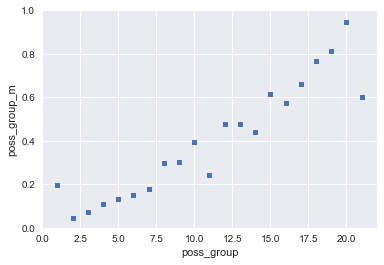

In [54]:
# 이제 x와 y를 다 구했으니, 그래프를 그려본다.

%matplotlib inline
from matplotlib import pyplot as plt

dfx3.plot(x='poss_group', y='poss_group_m', kind='scatter', ylim=[0,1])

## 그래프를 통해서 알 수 있는 것.

* group(19, 0.9 <= P' < 0.95), group(20, 0.95 <= P' < 1)은 80% 이상의 확률로 해당 상품을 재구매했다.  
* 오히려 group(21, P' == 1)인 경우는 60% 정도였는데, 이유는 1개 오더해서 1개 산 경우, 같이 표본이 적은 상태가 대부분이라 허수가 상당히 낀 상태다. 그럼에도 불구하고 0.6 수치는 적지 않다.
* 대체로 P'값이 클 수록 y값들이 비례해서 크다.(y = 0.9x)
* 80%의 신뢰도를 기준으로 한다면, logestic h_ceta = 0.85 혹은 0.9로 정하고 선을 긋는게 좋을 듯 하다.
